# Workgroup - group 3

## **Math Demonstrations**

### 1. Prove the Frisch–Waugh–Lovell theorem

Given the model:
\begin{align*}
y &= D \beta_1 + W \beta_2 + \mu
\end{align*}
where $y$ is an $n \times 1$ vector, $D$ is an $n \times k_1$ matrix, $\beta_1$ is a $k_1 \times 1$ vector, $W$ is an $n \times k_2$ matrix, $\beta_2$ is a $k_2 \times 1$ vector, and $\mu$ is an $n \times 1$ vector of error terms.

We can construct the following equation:

\begin{align*}
\epsilon_y &= \epsilon_D \phi + \xi
\end{align*}

Running $y$ on $W$, we get:

\begin{align*}
y &= W\hat{\alpha}_1 + \epsilon_y \iff \epsilon_y &= y - W\hat{\alpha}_1
\end{align*}

Similarly, running $D$ on $W$ gives us:

\begin{align*}
D &= W\hat{\alpha}_2 + \epsilon_D \iff \epsilon_D &= D - W\hat{\alpha}_2
\end{align*}

Running $\epsilon_y$ on $\epsilon_D$:
\begin{align*}
y - W \hat{\alpha}_1 &= (D - W \hat{\alpha}_2) \phi + \xi \\
y &= W \hat{\alpha}_1 + (D - W \hat{\alpha}_2) \phi + \xi \\
y &= W \hat{\alpha}_1 + D \phi - W \hat{\alpha}_2 \phi + \xi \\
y &= D \phi + W (\hat{\alpha}_1 - \hat{\alpha}_2 \phi) + \xi
\end{align*}

Comparing the original model with this, we can see that:
\begin{align*}
    \beta_1 &= \phi \\
    \beta_2 &= \hat{\alpha}_1 - \hat{\alpha}_2 \phi \\
    \mu &= \xi
\end{align*}

### 2. Show that the Conditional Expectation Function minimizes the expected squared error.

Given the model:
\begin{align*}
Y &= m(X) + e
\end{align*}
where $m(X)$ represents the conditional expectation of $Y$ on $X$. Let's define an arbitrary model:
\begin{align*}
Y &= g(X) + w
\end{align*}
where $g(X)$ represents any function of $X$.

Working with the expected squared error from the arbitrary model:
\begin{align*}
E[(Y-g(X))^2] &= E[(Y-m(X) + m(X)-g(X))^2] \\
&= E[(Y-m(X))^2 + 2(Y-m(X))(m(X)-g(X)) + (m(X)-g(X))^2] \\
&= E[e^2] + 2E[(Y-m(X))(m(X)-g(X))] + E[(m(X)-g(X))^2]
\end{align*}
Using the law of iterated expectations:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2] + 2E[E[(Y-m(X))(m(X)-g(X)) | X]] + E[(m(X)-g(X))^2]
\end{align*}
Since $m(X)$ and $g(X)$ are functions of $X$, the term $(m(X)-g(X))$ can be thought of as constant when conditioning on $X$. Thus:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2] + 2E[E[Y-m(X) | X](m(X)-g(X))] + E[(m(X)-g(X))^2]
\end{align*}
It is important to note that $E[Y-m(X) | X] = 0$ by definition of $m(X)$, so we get:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2] + E[(m(X)-g(X))^2]
\end{align*}
Because the second term in the equation is always non-negative, it is clear that the function is minimized when $g(X)$ equals $m(X)$. In which case:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2]
\end{align*}

This notebook contains an example for teaching.

## **Replication 1 - Code**

In the previous lab, we already analyzed data from the March Supplement of the U.S. Current Population Survey (2015) and answered the question how to use job-relevant characteristics, such as education and experience, to best predict wages. Now, we focus on the following inference question:

What is the difference in predicted wages between men and women with the same job-relevant characteristics?

Thus, we analyze if there is a difference in the payment of men and women (*gender wage gap*). The gender wage gap may partly reflect *discrimination* against women in the labor market or may partly reflect a *selection effect*, namely that women are relatively more likely to take on occupations that pay somewhat less (for example, school teaching).

To investigate the gender wage gap, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of men and women.

In [1]:
library(ggplot2)

### Data analysis

We consider the same subsample of the U.S. Current Population Survey (2015) as in the previous lab. Let us load the data set.

In [2]:
load("../../data/wage2015_subsample_inference.Rdata")
dim(data)

[1] 5150   20

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

### Filtering data to focus on college-advanced-educated workers

In [3]:
data <- data[data$ad == 1 | data$scl == 1 | data$clg == 1, colnames(data)]
attach(data) # make each variable as an object 

### Exploratory Data Analysis

In [4]:
colnames(data)

[1] "wage"  "lwage" "sex"   "shs"   "hsg"   "scl"   "clg"   "ad"    "mw"   
[10] "so"    "we"    "ne"    "exp1"  "exp2"  "exp3"  "exp4"  "occ"   "occ2" 
[19] "ind"   "ind2"

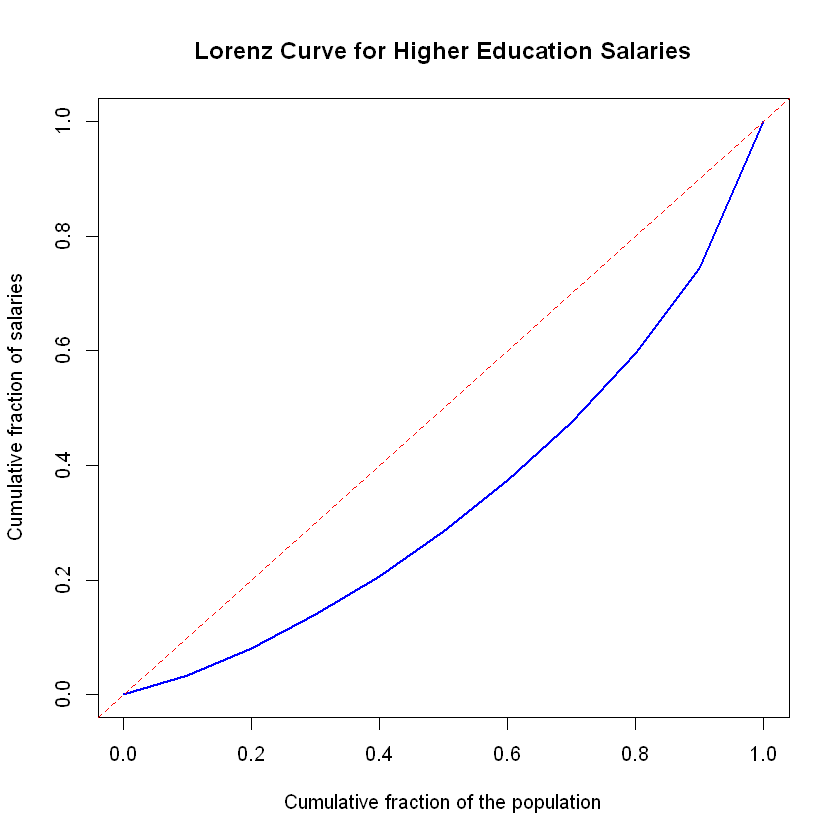

In [5]:
###################### Lorenz Curve for Salaries by Deciles for the subgroup of individuals who accessed higher education ######################
# Sort wages in ascending order
wage_sorted <- sort(wage)
# Compute the cumulative sum of sorted wages
cumulative_sum <- cumsum(wage_sorted)
# Calculate the deciles of the cumulative sum of wages
deciles <- quantile(cumulative_sum, probs = seq(0, 1, by = 0.1))

# Create a vector for the cumulative fraction of the population for x-axis
population_fraction <- seq(0, 1, by = 0.1)

# Calculate the cumulative fraction of salaries
salary_fraction <- quantile(deciles/sum(wage), probs = seq(0, 1, by = 0.1))

# Plot the Lorenz curve
plot(population_fraction, salary_fraction, type = "l", lwd = 2, col = "blue",
     main = "Lorenz Curve for Higher Education Salaries",
     xlab = "Cumulative fraction of the population",
     ylab = "Cumulative fraction of salaries")
abline(0, 1, lty = 2, col = "red")  # Equality line

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


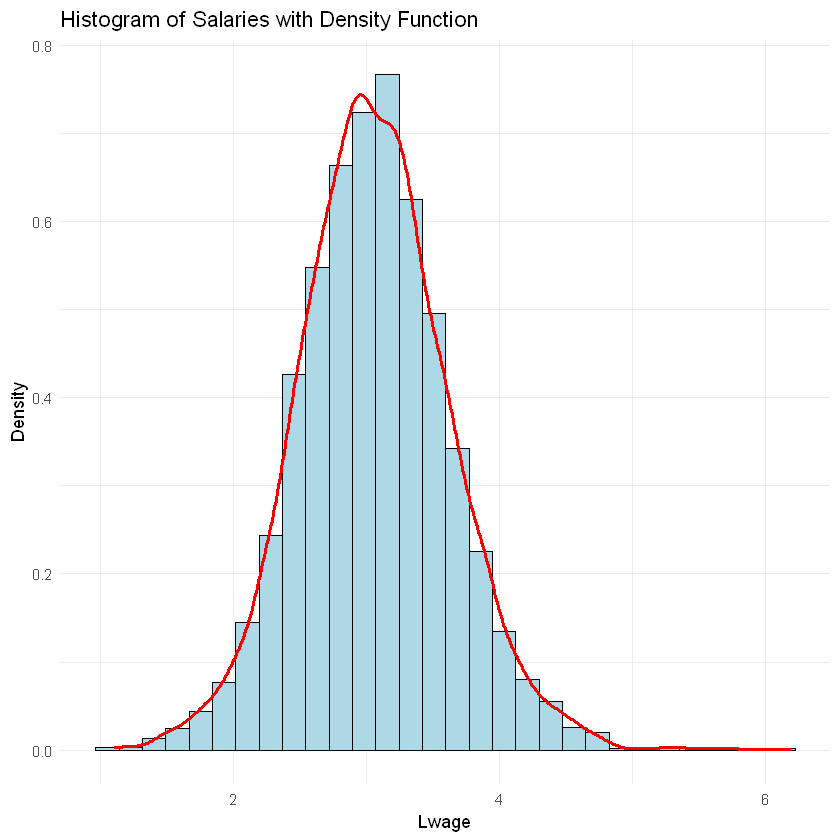

In [6]:
########################### Histogram for lwage ###########################

ggplot(data, aes(x = lwage)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
  geom_density(color = "red", size = 1) +
  labs(title = "Histogram of Salaries with Density Function", x = "Lwage", y = "Density") +
  theme_minimal()


Warning message:
"Use of `plot_data$proportion` is discouraged.
ℹ Use `proportion` instead."


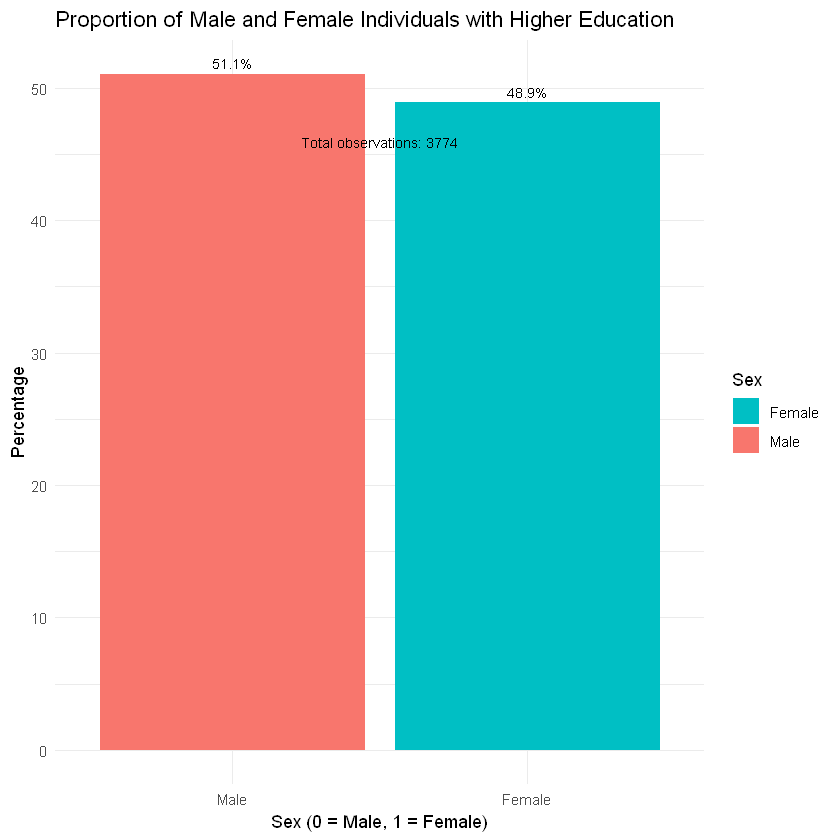

In [7]:
############################Graph bar sex
total_observations <- nrow(data)
proportions <- prop.table(table(data$sex)) * 100
plot_data <- data.frame(sex = factor(names(proportions), labels = c("Male", "Female")), proportion = as.numeric(proportions))

ggplot(plot_data, aes(x = sex, y = proportion, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Male and Female Individuals with Higher Education",
       x = "Sex (0 = Male, 1 = Female)", y = "Percentage",
       fill = "Sex") +
  theme_minimal() +
  geom_text(aes(label = paste0(round(proportion, 1), "%")), vjust = -0.5, size = 3) +
  geom_text(aes(x = 1.5, y = max(plot_data$proportion) * 0.9,
                label = paste("Total observations:", total_observations)), 
            hjust = 0.5, size = 3) +
  guides(fill = guide_legend(title = "Sex", reverse = TRUE))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




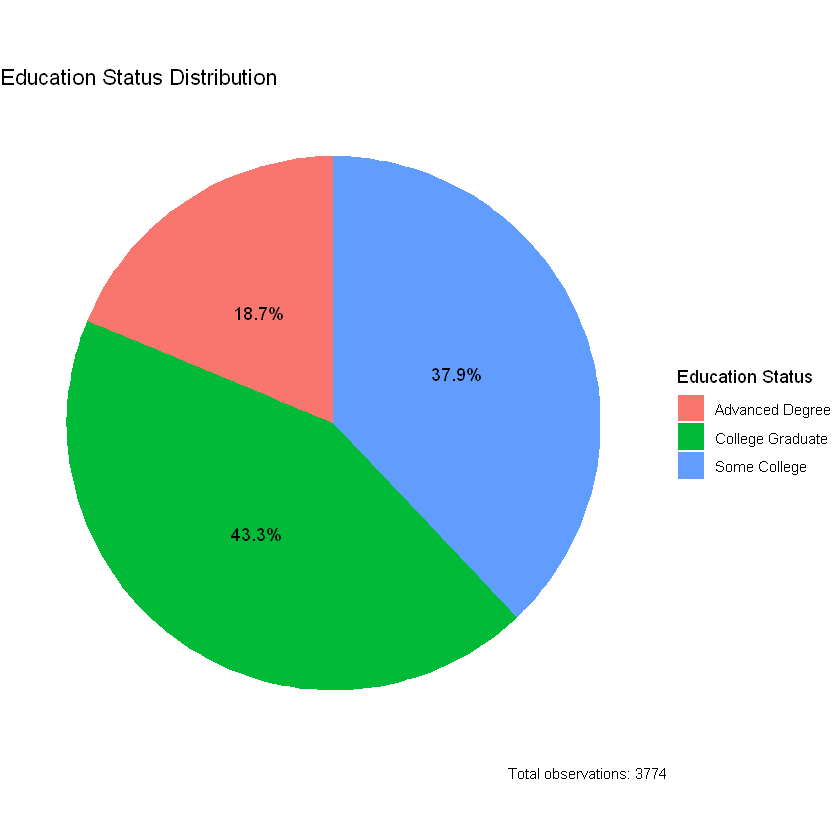

In [8]:
########################Education Status"Analysis of individuals who accessed higher education"
library(dplyr)
library(tidyr)
library(ggplot2)

data <- data %>%
  mutate(Education_Status = case_when(
    scl == 1 ~ "Some College",
    clg == 1 ~ "College Graduate",
    ad == 1 ~ "Advanced Degree"
  ))

edu_freq <- data %>%
  count(Education_Status)
total_obs <- sum(edu_freq$n)
edu_freq <- edu_freq %>%
  mutate(Percentage = n / total_obs * 100)

# Crear el gráfico de pastel
ggplot(edu_freq, aes(x = "", y = Percentage, fill = Education_Status)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) + 
  labs(title = "Education Status Distribution",
       x = NULL, y = NULL,
       fill = "Education Status",
       caption = paste("Total observations:", total_obs)) +
  scale_y_continuous(labels = scales::percent_format()) +  
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5)) + 
  theme_void() +
  theme(legend.position = "right")  

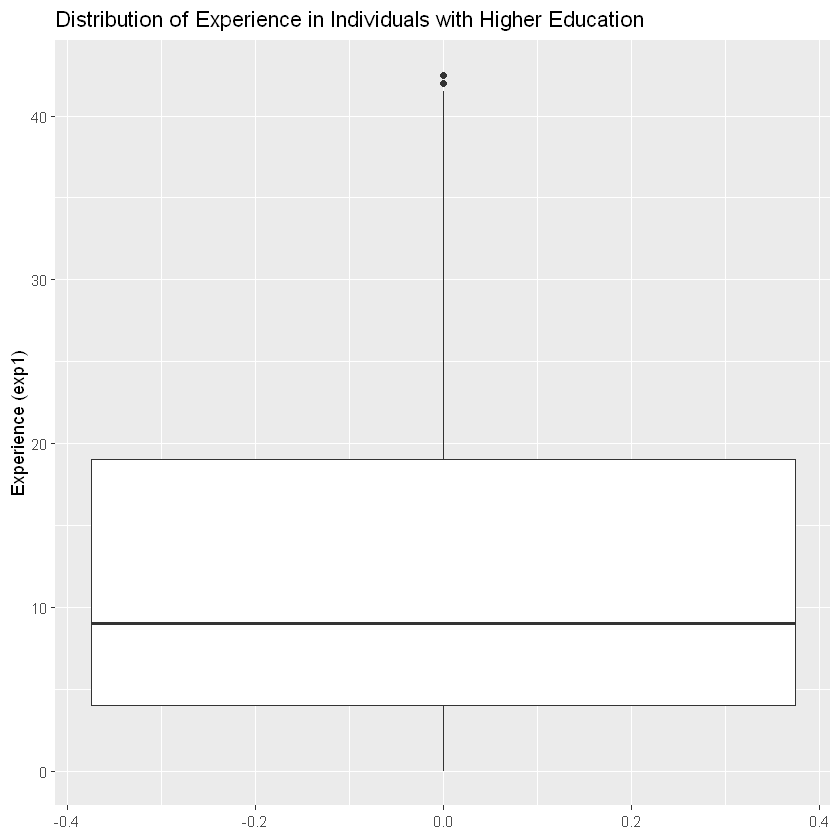

In [9]:
#######################################Experience
ggplot(data, aes(y = exp1)) +
  geom_boxplot() +
  labs(title = "Distribution of Experience in Individuals with Higher Education",
       y = "Experience (exp1)")

To start our (causal) analysis, we compare the sample means given gender:

In [5]:
install.packages("xtable")
library(xtable)

Z <- data[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]

data_female <- data[data$sex==1,]
Z_female <- data_female[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]


data_male <- data[data$sex==0,]
Z_male <- data_male[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]

table <- matrix(0, 12, 3)
table[1:12,1]   <- as.numeric(lapply(Z,mean))
table[1:12,2]   <- as.numeric(lapply(Z_male,mean))
table[1:12,3]   <- as.numeric(lapply(Z_female,mean))
rownames(table) <- c("Log Wage","Sex","Less then High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience")
colnames(table) <- c("All","Men","Women")
tab<- xtable(table, digits = 4)
tab

Installing package into 'C:/Users/Matias Villalba/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Matias Villalba\AppData\Local\Temp\RtmpCQtUEn\downloaded_packages


,All,Men,Women
,<dbl>,<dbl>,<dbl>
Log Wage,3.0627476,3.0994485,3.0244165
Sex,0.4891362,0.0000000,1.0000000
Less then High School,0.0000000,0.0000000,0.0000000
High School Graduate,0.0000000,0.0000000,0.0000000
Some College,0.3794383,0.4056017,0.3521127
Gollage Graduate,0.4334923,0.4362033,0.4306609
Advanced Degree,0.1870694,0.1581950,0.2172264
Northeast,0.2498675,0.2458506,0.2540628
Midwest,0.2983572,0.3034232,0.2930661


In [6]:
print(tab,type="html") # set type="latex" for printing table in LaTeX

<!-- html table generated in R 4.3.3 by xtable 1.8-4 package -->
<!-- Sat Apr 13 20:46:24 2024 -->
<table border=1>
<tr> <th>  </th> <th> All </th> <th> Men </th> <th> Women </th>  </tr>
  <tr> <td align="right"> Log Wage </td> <td align="right"> 3.0627 </td> <td align="right"> 3.0994 </td> <td align="right"> 3.0244 </td> </tr>
  <tr> <td align="right"> Sex </td> <td align="right"> 0.4891 </td> <td align="right"> 0.0000 </td> <td align="right"> 1.0000 </td> </tr>
  <tr> <td align="right"> Less then High School </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> High School Graduate </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Some College </td> <td align="right"> 0.3794 </td> <td align="right"> 0.4056 </td> <td align="right"> 0.3521 </td> </tr>
  <tr> <td align="right"> Gollage Graduate </td> <td align="right"> 0.4335

<!-- html table generated in R 4.3.3 by xtable 1.8-4 package -->
<!-- Sat Apr 13 20:46:24 2024 -->
<table border=1>
<tr> <th>  </th> <th> All </th> <th> Men </th> <th> Women </th>  </tr>
  <tr> <td align="right"> Log Wage </td> <td align="right"> 3.0627 </td> <td align="right"> 3.0994 </td> <td align="right"> 3.0244 </td> </tr>
  <tr> <td align="right"> Sex </td> <td align="right"> 0.4891 </td> <td align="right"> 0.0000 </td> <td align="right"> 1.0000 </td> </tr>
  <tr> <td align="right"> Less then High School </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> High School Graduate </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> <td align="right"> 0.0000 </td> </tr>
  <tr> <td align="right"> Some College </td> <td align="right"> 0.3794 </td> <td align="right"> 0.4056 </td> <td align="right"> 0.3521 </td> </tr>
  <tr> <td align="right"> Gollage Graduate </td> <td align="right"> 0.4335 </td> <td align="right"> 0.4362 </td> <td align="right"> 0.4307 </td> </tr>
  <tr> <td align="right"> Advanced Degree </td> <td align="right"> 0.1871 </td> <td align="right"> 0.1582 </td> <td align="right"> 0.2172 </td> </tr>
  <tr> <td align="right"> Northeast </td> <td align="right"> 0.2499 </td> <td align="right"> 0.2459 </td> <td align="right"> 0.2541 </td> </tr>
  <tr> <td align="right"> Midwest </td> <td align="right"> 0.2984 </td> <td align="right"> 0.3034 </td> <td align="right"> 0.2931 </td> </tr>
  <tr> <td align="right"> South </td> <td align="right"> 0.2226 </td> <td align="right"> 0.2308 </td> <td align="right"> 0.2140 </td> </tr>
  <tr> <td align="right"> West </td> <td align="right"> 0.2292 </td> <td align="right"> 0.2199 </td> <td align="right"> 0.2389 </td> </tr>
  <tr> <td align="right"> Experience </td> <td align="right"> 12.5102 </td> <td align="right"> 12.2023 </td> <td align="right"> 12.8318 </td> </tr>
   </table>

In particular, the table above shows that the difference in average *logwage* between men and women is equal to $0,075$

In [12]:
mean(data_female$lwage)-mean(data_male$lwage)

[1] -0.07503201

Thus, the unconditional gender wage gap is about $7,5$\% for the group of never married workers (women get paid less on average in our sample). We also observe that never married working women are relatively more educated than working men and have lower working experience.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in R.

In [10]:
#install.packages("sandwich")
library(sandwich)

nocontrol.fit <- lm(lwage ~ sex, data = data)
nocontrol.est <- summary(nocontrol.fit)$coef["sex",1]
HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC');
nocontrol.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

# print unconditional effect of gender and the corresponding standard error
cat ("The estimated gender coefficient is",nocontrol.est," and the corresponding robust standard error is",nocontrol.se) 


The estimated gender coefficient is -0.07503201  and the corresponding robust standard error is 0.0183426

Note that the standard error is computed with the *R* package *sandwich* to be robust to heteroskedasticity. 


Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

Let us run the ols regression with controls.

In [11]:
# Ols regression with controls

flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)

#   Note that ()*() operation in formula objects in R creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we) +  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  This is not intuitive at all, but that's what it does.

control.fit <- lm(flex, data=data)
control.est <- summary(control.fit)$coef[2,1]

summary(control.fit)

cat("Coefficient for OLS with controls", control.est)

HCV.coefs <- vcovHC(control.fit, type = 'HC');
control.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors


Call:
lm(formula = flex, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88469 -0.28018 -0.00257  0.27071  2.87358 

Coefficients: (11 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.880838   0.463424   8.374  < 2e-16 ***
sex         -0.067634   0.017476  -3.870 0.000111 ***
exp1        -0.108571   0.182969  -0.593 0.552963    
exp2         2.760461   2.185329   1.263 0.206608    
exp3        -1.557529   0.928441  -1.678 0.093518 .  
exp4         0.245175   0.125503   1.954 0.050834 .  
shs                NA         NA      NA       NA    
hsg                NA         NA      NA       NA    
scl         -0.268071   0.128942  -2.079 0.037689 *  
clg         -0.044201   0.071314  -0.620 0.535423    
occ22        0.148912   0.134319   1.109 0.267660    
occ23        0.151683   0.173250   0.876 0.381353    
occ24        0.024109   0.189196   0.127 0.898608    
occ25       -0.435165   0.197117  -2.208 0.0

Coefficient for OLS with controls -0.0676339

The estimated regression coefficient $\beta_1\approx-0.0676$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $4$\% for women increases to about $7$\% after controlling for worker characteristics.  


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

In [19]:
# Partialling-Out using ols

# models
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we) # model for D

# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data=data)$res
# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data=data)$res

# regression of Y on D after partialling-out the effect of W
partial.fit <- lm(t.Y~t.D)
partial.est <- summary(partial.fit)$coef[2,1]

cat("Coefficient for D via partialling-out", partial.est)

# standard error
HCV.coefs <- vcovHC(partial.fit, type = 'HC')
partial.se <- sqrt(diag(HCV.coefs))[2]

# confidence interval
confint(partial.fit)[2,]

Coefficient for D via partialling-out -0.0676339

2.5 %      97.5 % 
-0.10082303 -0.03444476

Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 

In the following, we illustrate the partialling-out approach using lasso instead of ols. 

Next, we summarize the results.

In [20]:
table<- matrix(0, 3, 2)
table[1,1]<- nocontrol.est  
table[1,2]<- nocontrol.se   
table[2,1]<- control.est
table[2,2]<- control.se    
table[3,1]<- partial.est  
table[3,2]<- partial.se  

colnames(table)<- c("Estimate","Std. Error")
rownames(table)<- c("Without controls", "full reg", "partial reg")	
tab<- xtable(table, digits=c(3, 3, 4))
tab

,Estimate,Std. Error
,<dbl>,<dbl>
Without controls,-0.07503201,0.01834260
full reg,-0.06763390,0.01676536
partial reg,-0.06763390,0.01676536


In [21]:
print(tab, type="html")

<!-- html table generated in R 4.3.3 by xtable 1.8-4 package -->
<!-- Sat Apr 13 20:58:46 2024 -->
<table border=1>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th>  </tr>
  <tr> <td align="right"> Without controls </td> <td align="right"> -0.075 </td> <td align="right"> 0.0183 </td> </tr>
  <tr> <td align="right"> full reg </td> <td align="right"> -0.068 </td> <td align="right"> 0.0168 </td> </tr>
  <tr> <td align="right"> partial reg </td> <td align="right"> -0.068 </td> <td align="right"> 0.0168 </td> </tr>
   </table>


<!-- html table generated in R 4.3.3 by xtable 1.8-4 package -->
<!-- Sat Apr 13 20:58:46 2024 -->
<table border=1>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th>  </tr>
  <tr> <td align="right"> Without controls </td> <td align="right"> -0.075 </td> <td align="right"> 0.0183 </td> </tr>
  <tr> <td align="right"> full reg </td> <td align="right"> -0.068 </td> <td align="right"> 0.0168 </td> </tr>
  <tr> <td align="right"> partial reg </td> <td align="right"> -0.068 </td> <td align="right"> 0.0168 </td> </tr>
   </table>


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'data1' will be disregarded"
Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'data1' will be disregarded"


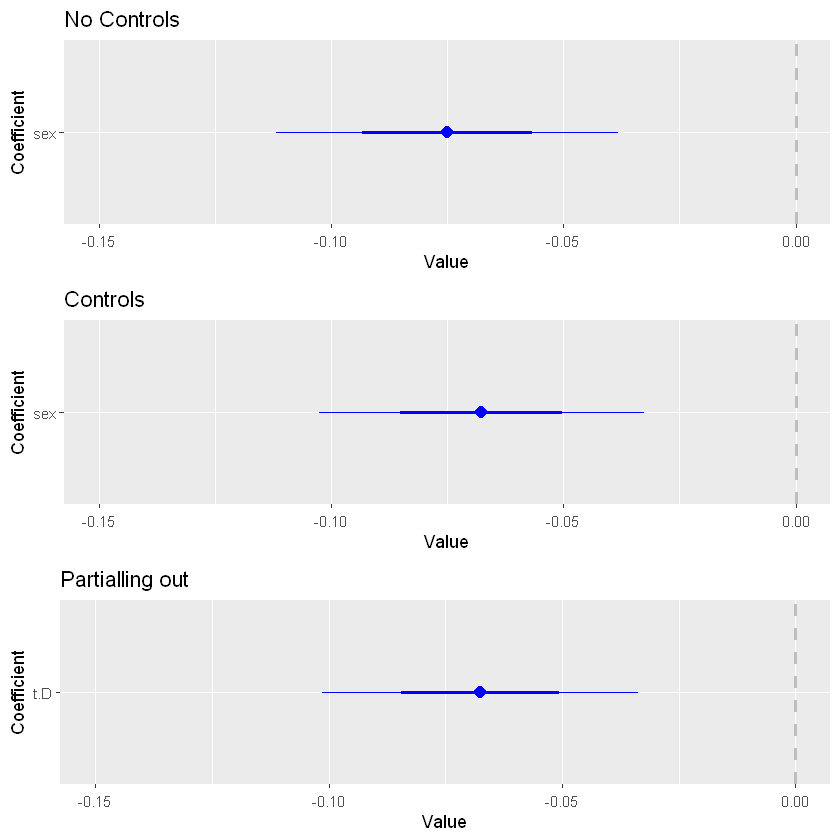

In [16]:
##################################################COEF PLOT
library(coefplot)
library(gridExtra)
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we) # model for D
# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data1=data1)$res
# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data1=data1)$res

# Ajustar los modelos
nocontrol.fit <- lm(lwage ~ sex)
control.fit <- lm(lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we))
partial.fit <- lm(t.Y ~ t.D)



# Graficar los coeficientes estimados con límites en el eje x ajustados
plot_nocontrol <- coefplot(nocontrol.fit, coefficients = "sex")+labs(title = "No Controls") + xlim(-0.15, 0)
plot_control <- coefplot(control.fit, coefficients = "sex")+labs(title = "Controls")  + xlim(-0.15, 0)
plot_partial <- coefplot(partial.fit, coefficients = "t.D")+labs(title = "Partialling out")  + xlim(-0.15, 0)

# Unir los gráficos verticalmente
combined_plot <- grid.arrange(plot_nocontrol, plot_control, plot_partial, nrow = 3)

The coefficient associated with the gender variable, which indicates the prediction of being female on salary, is initially negative. This suggests that, on average, women have lower salaries than men. However, after adding these controls, such as work experience or educational level, the negative coefficient associated with the gender variable becomes  less negative.

This change in the gender coefficient could be explained by the fact that the control variables are capturing some of the variability in salaries that was previously incorrectly attributed to gender. This suggests that additional factors, beyond gender, are influencing salaries, and the impact of gender on salaries is less pronounced once these other variables are taken into account. Besides, both FWL and including control  variables in the regression model yield coefficient estimates for the variable of interest that reflect its net impact on the dependent variable, once the effects of other explanatory variables have been taken into account.

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.10036 -0.010002"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 4.8847"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.6408e-15"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 410.95"


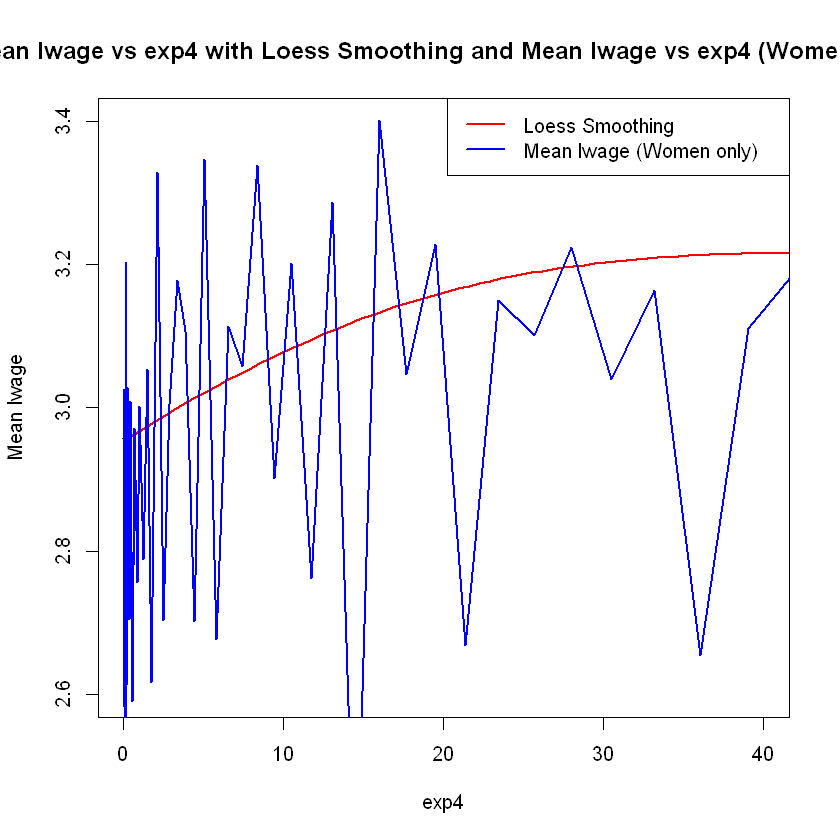

In [19]:
# Generar valores de exp4 para predecir las medias de lwage con más puntos
exp4_seq <- seq(min(data$exp4), max(data$exp4), length.out = 500)

# Ajustar el modelo LOESS 
loess_model <- loess(lwage ~ (exp4 + sex), data = data, span = 0.9)

# Crear un nuevo data frame con los valores de exp4 para predecir
new_data <- data.frame(exp4 = exp4_seq, sex = 1)

# Predecir las medias de lwage utilizando el modelo loess
lwage_mean_pred <- predict(loess_model, newdata = new_data)

# Calcula la media de lwage para cada valor único de exp4 solo para mujeres
mean_lwage_women <- tapply(subset(data, sex == 1)$lwage, subset(data, sex == 1)$exp4, mean)

# Graficar ambas relaciones en un solo gráfico
plot(exp4_seq, lwage_mean_pred,
     type = "l",  # Tipo de gráfico: línea
     col = "red", # Color de la línea para el modelo LOESS
     lwd = 2,     # Grosor de la línea para el modelo LOESS
     xlab = "exp4",
     ylab = "Mean lwage",
     main = "Mean lwage vs exp4 with Loess Smoothing and Mean lwage vs exp4 (Women only)",
     xlim = c(0, 40),  # Limitar los valores en el eje x de 0 a 40
     ylim = c(2.6, 3.4))   # Ajustar la escala del eje y de 2 a 4
lines(as.numeric(names(mean_lwage_women)), mean_lwage_women, col = "blue", lwd = 2)  # Agregar la relación de media de lwage vs exp4
legend("topright", legend = c("Loess Smoothing", "Mean lwage (Women only)"), col = c("red", "blue"), lty = 1, lwd = 2)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.10036 -0.010002"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 4.8847"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.6408e-15"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 410.95"


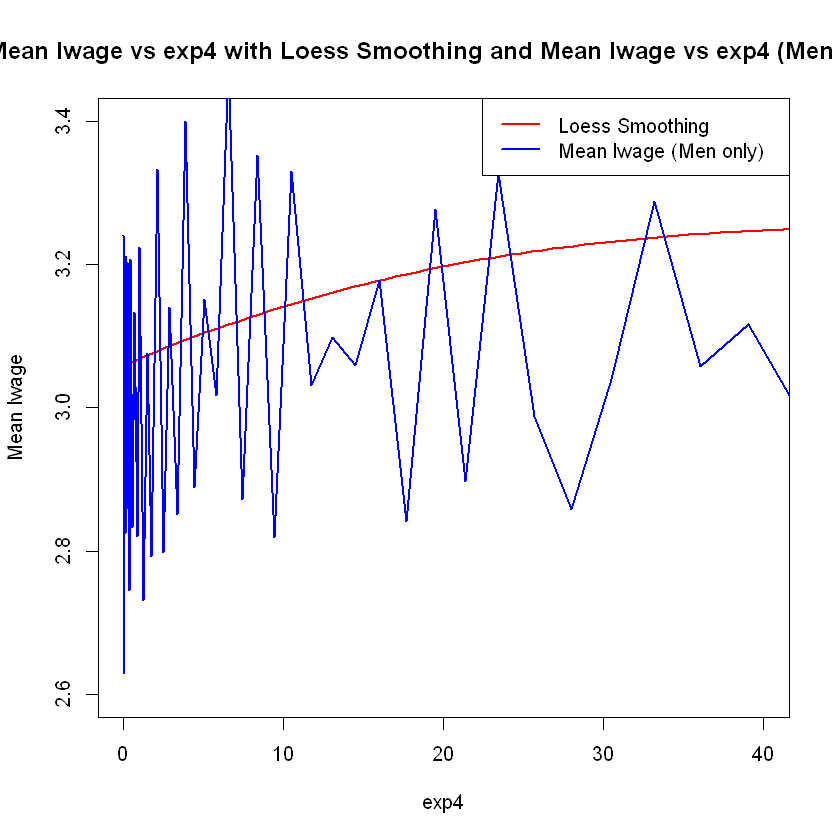

In [20]:
# Generar valores de exp4 para predecir las medias de lwage con más puntos
exp4_seq <- seq(min(data$exp4), max(data$exp4), length.out = 500)

# Ajustar el modelo LOESS 
loess_model_men <- loess(lwage ~ (exp4 + sex), data = data, span = 0.9)

# Crear un nuevo data frame con los valores de exp4 para predecir
new_data_men <- data.frame(exp4 = exp4_seq, sex = 0)  # Solo varones

# Predecir las medias de lwage utilizando el modelo loess para varones
lwage_mean_pred_men <- predict(loess_model_men, newdata = new_data_men)

# Calcula la media de lwage para cada valor único de exp4 solo para varones
mean_lwage_men <- tapply(subset(data, sex == 0)$lwage, subset(data, sex == 0)$exp4, mean)

# Graficar ambas relaciones en un solo gráfico
plot(exp4_seq, lwage_mean_pred_men,
     type = "l",  # Tipo de gráfico: línea
     col = "red", # Color de la línea para el modelo LOESS
     lwd = 2,     # Grosor de la línea para el modelo LOESS
     xlab = "exp4",
     ylab = "Mean lwage",
     main = "Mean lwage vs exp4 with Loess Smoothing and Mean lwage vs exp4 (Men only)",
     xlim = c(0, 40),  # Limitar los valores en el eje x de 0 a 40
     ylim = c(2.6, 3.4))   # Ajustar la escala del eje y de 2 a 4
lines(as.numeric(names(mean_lwage_men)), mean_lwage_men, col = "blue", lwd = 2)  # Agregar la relación de media de lwage vs exp4 para varones
legend("topright", legend = c("Loess Smoothing", "Mean lwage (Men only)"), col = c("red", "blue"), lty = 1, lwd = 2)

Next we try "extra" flexible model, where we take interactions of all controls, giving us about 1000 controls.

In [21]:

extraflex <- lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+scl+clg+occ2+ind2+mw+so+we)^2

control.fit <- lm(extraflex, data=data)
#summary(control.fit)
control.est <- summary(control.fit)$coef[2,1]


cat("Number of Extra-Flex Controls", length(control.fit$coef)-1, "\n")


cat("Coefficient for OLS with extra flex controls", control.est)


#summary(control.fit)



HCV.coefs <- vcovHC(control.fit, type = 'HC');

n= length(wage); p =length(control.fit$coef);

control.se <- sqrt(diag(HCV.coefs))[2]*sqrt(n/(n-p)) # Estimated std errors

# crude adjustment for the effect of dimensionality on OLS standard errors, motivated by Cattaneo, Jannson, and Newey (2018)

# for really correct way of doing this, we need to implement Cattaneo, Jannson, and Newey (2018)'s procedure.

Number of Extra-Flex Controls 979 
Coefficient for OLS with extra flex controls -0.05950266

## **Cross-Validation in Lasso Regression - Manual Implementation Task**

In [ ]:
install.packages("ggplot2")

In [ ]:
library(caret)

**1. Data Preparation**

Load the March Supplement of the U.S. Current Population Survey, year 2015. (wage2015_subsample_inference.Rdata)

In [ ]:
load("..\..\data\wage2015_subsample_inference.csv")

# Print a summary of the data frame
print("Summary of the data:")
summary(data)

# Print dimensions of the data frame
print("Dimensions of the data:")
dim(data)

In [ ]:
flex <- lwage ~ sex + shs + hsg + scl + clg + occ2 + ind2 + mw + so + we +
  (exp1 + exp2 + exp3 + exp4) * (shs + hsg + scl + clg + occ2 + ind2 + mw + so + we)

# Fit the model using lm() function for OLS regression
flex_results <- lm(flex, data=data)

summary(flex_results)

In [ ]:
# Get exogenous variables from the flexible model
X <- model.matrix(flex_results)

# Set endogenous variable
y <- data$lwage  # Directly from the data frame

# Alternatively, extracting response variable from the model object
y_model <- model.response(model.frame(flex_results))

# Verify the contents
head(X)  # Shows the first few rows of the model matrix
head(y)  # Shows the first few values of the response variable

In [ ]:
set.seed(24)  # For reproducibility

# Calculate the number of observations to split on
n <- nrow(X)
train_size <- floor(0.8 * n)

# Randomly sample indices for the training data
train_indices <- sample(seq_len(n), size = train_size)

# Create training and test datasets
X_train <- X[train_indices, , drop = FALSE]
X_test <- X[-train_indices, , drop = FALSE]
y_train <- y[train_indices]
y_test <- y[-train_indices]

In [ ]:
# Calculate the mean and standard deviation from the training set
train_mean <- apply(X_train, 2, mean)
train_sd <- apply(X_train, 2, sd)

# Standardize the training data
X_train_scaled <- sweep(X_train, 2, train_mean, FUN = "-")
X_train_scaled <- sweep(X_train_scaled, 2, train_sd, FUN = "/")

# Standardize the test data using the same mean and standard deviation as calculated from the training set
X_test_scaled <- sweep(X_test, 2, train_mean, FUN = "-")
X_test_scaled <- sweep(X_test_scaled, 2, train_sd, FUN = "/")

# Check the results of scaling
head(X_train_scaled)
head(X_test_scaled)

**2. Define a Range of Alpha (Lambda in our equation) Values**

We create a list or array of alpha values to iterate over. These will be the different regularization parameters we test. We started testing from 0.1 to 0.5 and found that the MSE in cross-validation was reducing when the alpha value was incrementing. Therefore, we tried with higher values.

In [ ]:
alphas <- seq(0.1, 0.5, by = 0.1)

**3. Partition the Dataset for k-Fold Cross-Validation**

We divide the dataset into 5 subsets (or folds). Since we are working with a regression task (predicting the log of wage), we use the K-Fold cross-validator from sklearn. We ensure the data is shuffled by adding 'shuffle=True' and set a random state for a reproducible output.

In [ ]:
set.seed(24)  # Set the random seed for reproducibility

# Create a K-fold cross-validation object
kf <- createFolds(y = 1:nrow(X_train), k = 5, list = TRUE, returnTrain = FALSE)

**4. Lasso Regression Implementation**

Implement a function to fit a Lasso Regression model given a training dataset and an alpha value. The function should return the model's coefficients and intercept.

In [ ]:
lasso_regression <- function(X_train, y_train, alpha, iterations=100, learning_rate=0.01) {
  # Get the dimensions of the training data
  m <- nrow(X_train)
  n <- ncol(X_train)
  
  # Initialize weights (coefficients) and bias (intercept)
  W <- matrix(0, nrow = n, ncol = 1)  # Coefficients
  b <- 0                                # Intercept
  
  # Perform gradient descent
  for (i in 1:iterations) {
    Y_pred <- X_train %*% W + b  # Predicted values
    
    dW <- matrix(0, nrow = n, ncol = 1)  # Initialize gradient of weights
    for (j in 1:n) {
      if (W[j, 1] > 0) {
        dW[j, 1] <- (-2 * sum(X_train[, j] * (y_train - Y_pred)) + alpha) / m
      } else {
        dW[j, 1] <- (-2 * sum(X_train[, j] * (y_train - Y_pred)) - alpha) / m
      }
    }
    
    db <- -2 * sum(y_train - Y_pred) / m  # Gradient of bias
    
    # Update weights and bias using gradient descent
    W <- W - learning_rate * dW
    b <- b - learning_rate * db
  }
  
  # Return weights (coefficients) and bias (intercept)
  return(list(W = W, b = b))
}

**5. Cross-Validation Loop and 6. Selection of Optimal Alpha**

We immplement a for loop to fit the lasso regression. Also, we find the best value of alpha that reduces the average MSE for each fold.

In [ ]:
# Cross-validation function to calculate average MSE for given alpha values
cross_validate_lasso <- function(X_train, y_train, alphas, kf, iterations=100, learning_rate=0.01) {
  avg_mse_values <- numeric(length(alphas))
  min_avg_mse <- Inf
  best_alpha <- NULL
  
  for (i in seq_along(alphas)) {
    alpha <- alphas[i]
    mse_list <- numeric(kf$n)
    
    for (fold in 1:kf$n) {
      train_index <- kf$inFold[[fold]]
      val_index <- kf$outFold[[fold]]
      
      X_train_fold <- X_train[train_index, ]
      X_val_fold <- X_train[val_index, ]
      y_train_fold <- y_train[train_index]
      y_val_fold <- y_train[val_index]
      
      # Train Lasso regression model with the current alpha
      model <- lasso_regression(X_train_fold, y_train_fold, alpha, iterations, learning_rate)
      W <- model$W
      b <- model$b
      
      # Make predictions on validation set
      y_pred_val <- X_val_fold %*% W + b
      
      # Calculate MSE for this fold
      mse_fold <- mean((y_val_fold - y_pred_val)^2)
      mse_list[fold] <- mse_fold
    }
    
    # Calculate average MSE across all folds
    avg_mse <- mean(mse_list)
    avg_mse_values[i] <- avg_mse
    cat(sprintf("Alpha=%.1f, Average MSE: %.5f\n", alpha, avg_mse))
    
    # Update best alpha and minimum average MSE
    if (avg_mse < min_avg_mse) {
      min_avg_mse <- avg_mse
      best_alpha <- alpha
    }
  }
  
  cat(sprintf("Best Alpha: %.1f, Minimum Average MSE: %.5f\n", best_alpha, min_avg_mse))
  
  # Plotting the cross-validated MSE for each alpha value
  plot(alphas, avg_mse_values, type = "o", pch = 19, lty = 1, col = "blue",
       xlab = "Alpha", ylab = "Average MSE",
       main = "Cross-Validated MSE for Different Alpha Values",
       xlim = range(alphas), ylim = range(avg_mse_values),
       xaxt = "n")
  axis(1, at = alphas, labels = alphas)
  grid()
}

# Perform cross-validated Lasso regression
cross_validate_lasso(X_train, y_train, alphas, kf, iterations = 100, learning_rate = 0.01)

**7. Model Training and Evaluation**

In [ ]:
# Make predictions on test data
y_pred <- X_test %*% W + b

In [ ]:
lasso_corr <- cor(y_test, y_pred)
lasso_mae <- mean(abs(y_test - y_pred))
lasso_mse <- mean((y_test - y_pred)^2)

# Print results
cat(sprintf("Correlation: %.4f\n", lasso_corr))
cat(sprintf("MAE: %.4f\n", lasso_mae))
cat(sprintf("MSE: %.4f\n", lasso_mse))

**8. Report Results**

We began by selecting the parameters for a flexible model, one that includes interactions. After selecting the parameters, we found that the alpha value that produced the lowest mean squared error (MSE) in cross-validation was 60. We then trained the model using all the available training data with the best alpha value. Using the fitted betas, we predicted the lwage using the test X vector. The resulting MSE in the test data was 0.3569, which was lower than in the training data (which was 0.41906). This indicates that the model is not overfitting and that we have found a good correlation score (R square) of 50%.